In [1]:
import sys 
sys.path = ["/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Patchplot/patchworklib"] + sys.path
import seaborn as sns
import patchworklib as pw
import pandas as pd
pw.overwrite_axisgrid()

<Figure size 72x72 with 0 Axes>

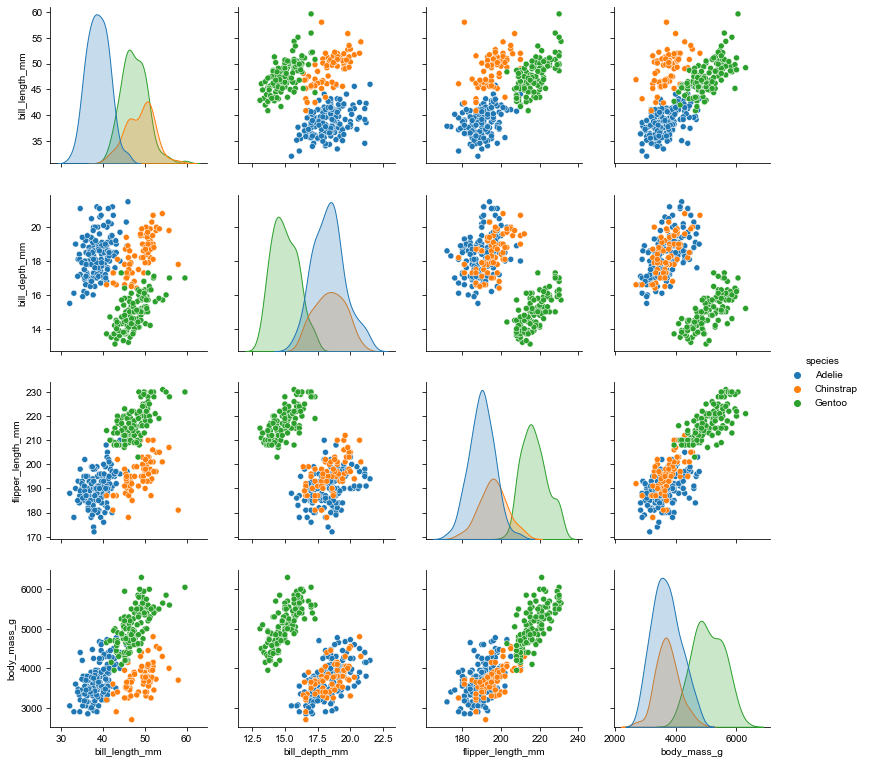

In [2]:
df  = sns.load_dataset("penguins")
g1  = sns.pairplot(df, hue="species")
g1  = pw.load_seaborngrid(g1)
g1.savefig()

In [3]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g2 = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(10, 11))

g2.ax_row_dendrogram.remove()
g2 = pw.load_seaborngrid(g2) 

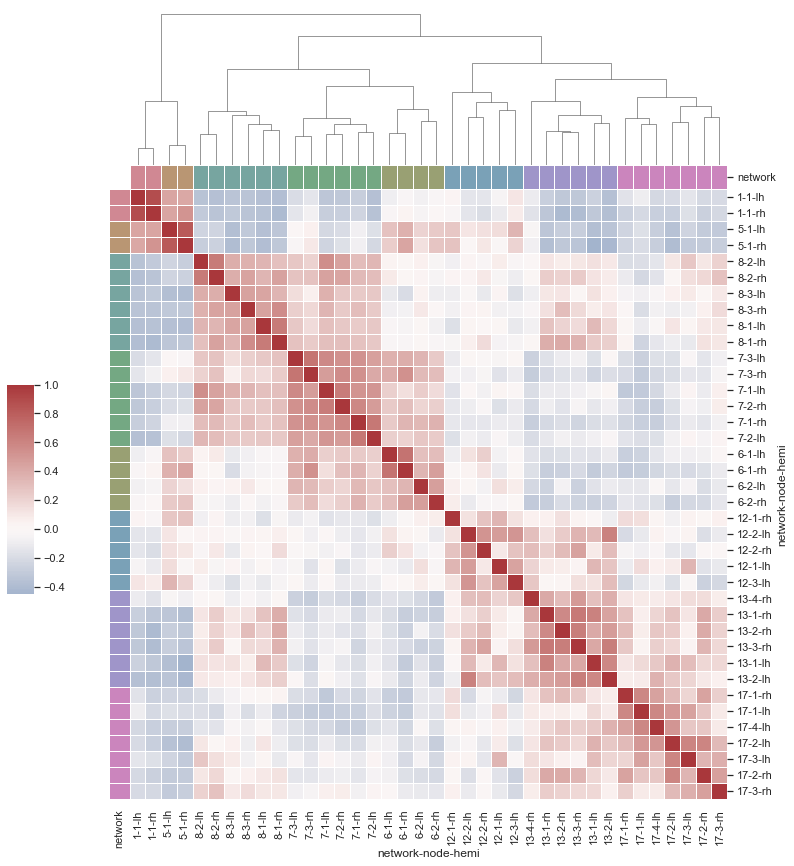

In [4]:
g2.savefig()

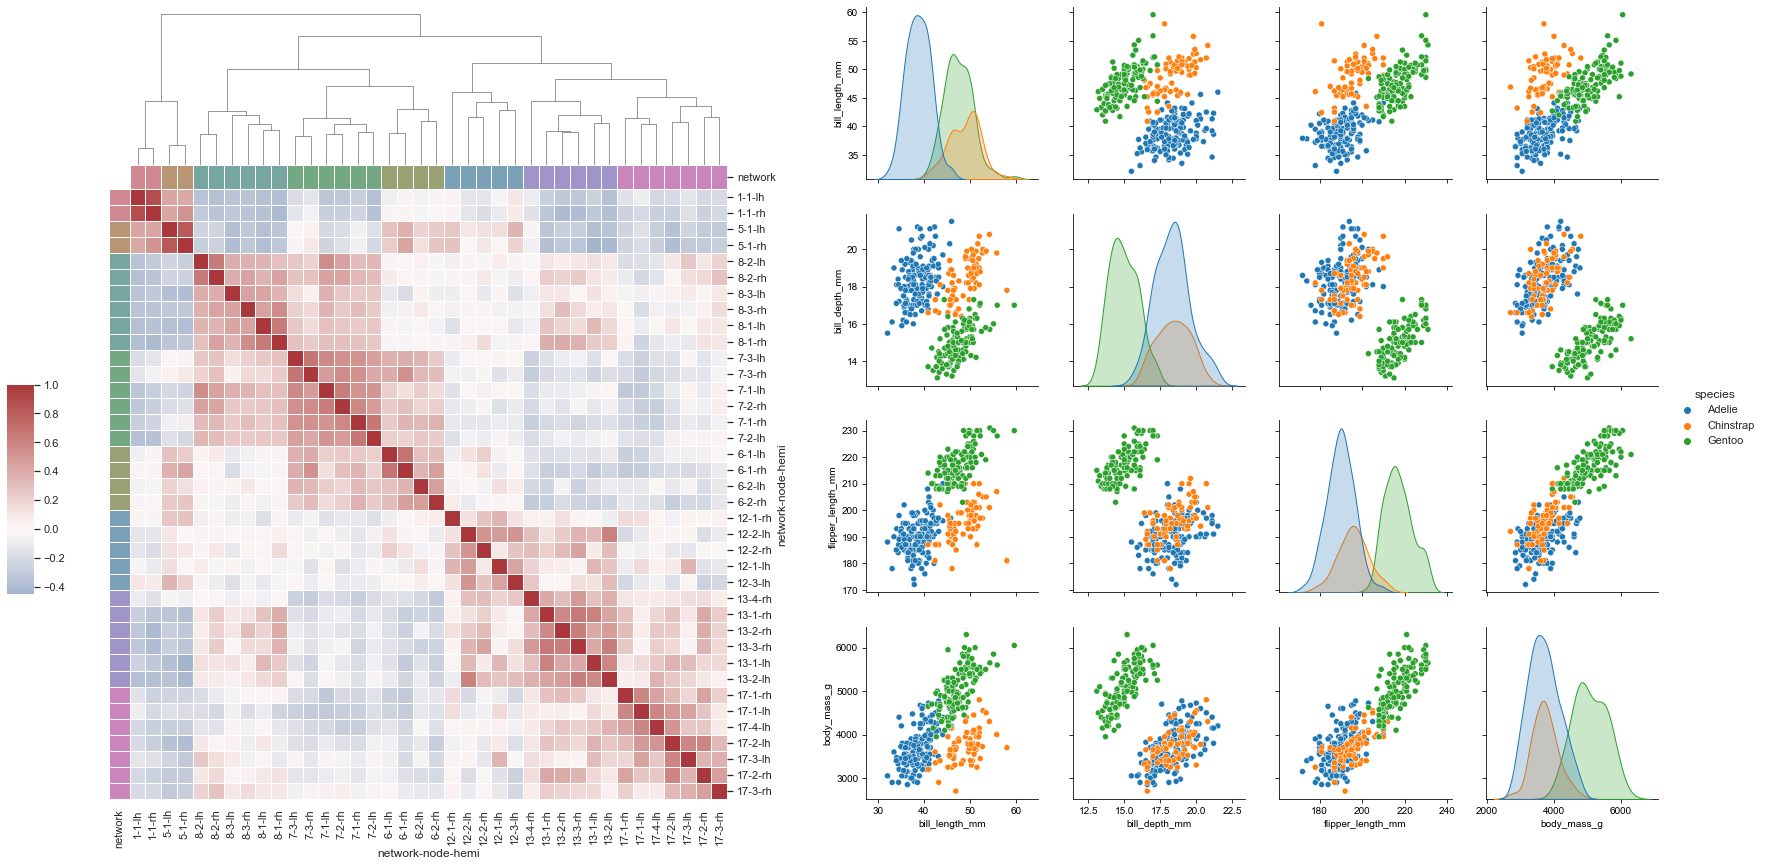

In [5]:
(g2|g1).savefig()

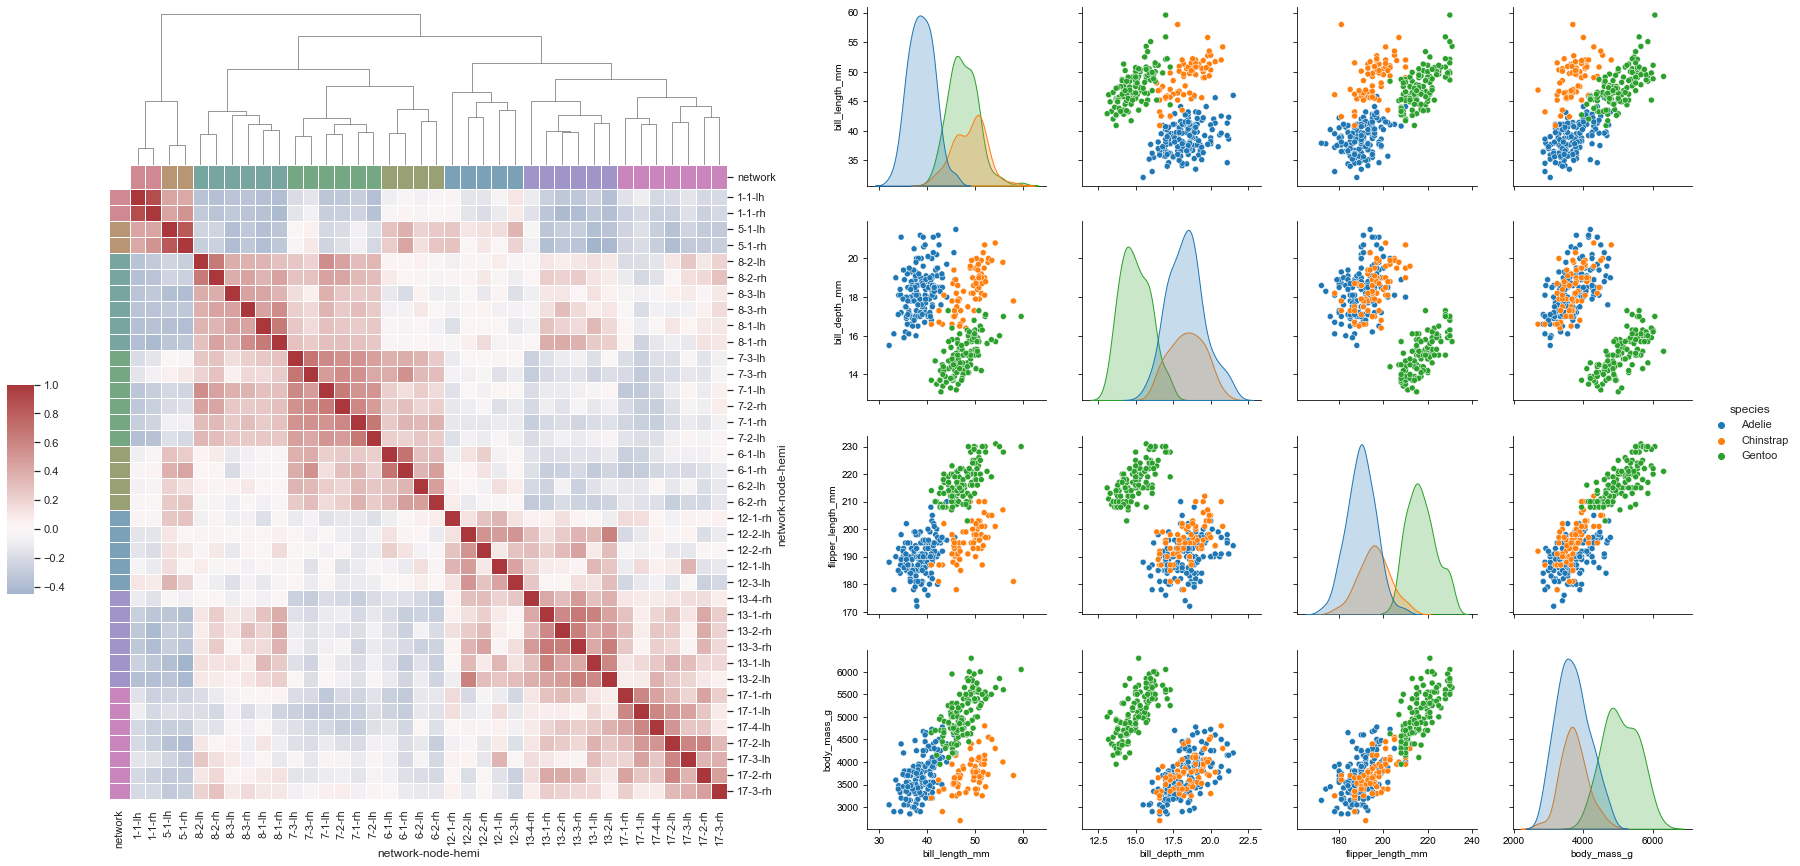

In [6]:
(g2.outline|g1.outline).savefig()

In [7]:
iris       = sns.load_dataset("iris")
species    = iris.pop("species")
lut        = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g3         = sns.clustermap(iris, row_colors=row_colors)
g3         = pw.load_seaborngrid(g3) 

<Figure size 432x288 with 0 Axes>

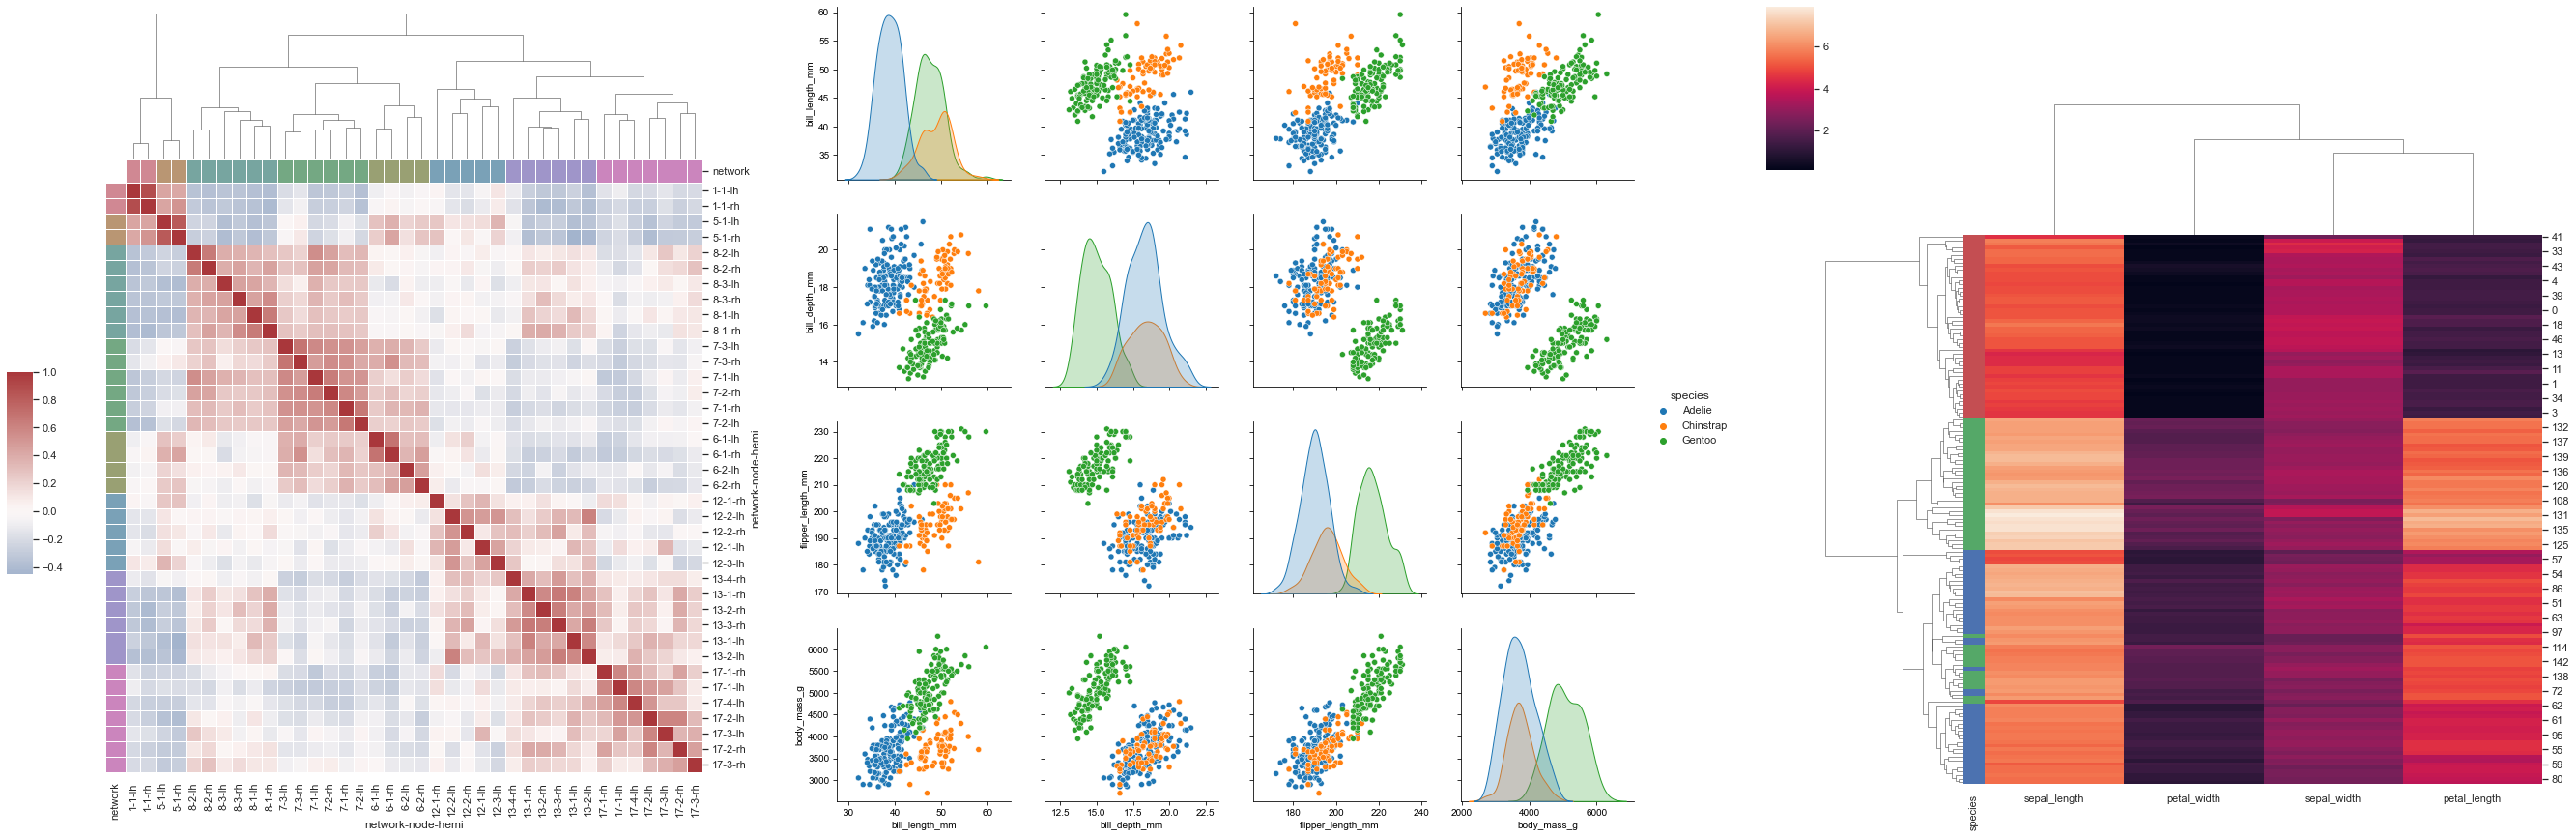

In [8]:
(g2.outline|g1.outline|g3.outline).savefig()